In [1]:
%cd /home/caitsithx/courses/deeplearning1/nbs

%matplotlib inline
import utils; reload(utils)
from utils import *

/home/caitsithx/courses/deeplearning1/nbs


/home/caitsithx/anaconda2/lib/python2.7/site-packages/theano/gpuarray/dnn.py:135: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to version 5.1.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 6021 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)
Using Theano backend.


# Todos

1. create validation set and sample
2. move to separate dirs for each set
3. finetune and train
4. submit

# Data Preparation

In [2]:
import glob
import numpy as np
import os
from shutil import copyfile
from PIL import Image
from IPython.display import FileLink

In [ ]:
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/valid
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/valid/cats
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/valid/dogs

%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/train/cats
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], "../../valid/cats/" + shuf[i])
    
%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/train/dogs
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], "../../valid/dogs/" + shuf[i])

In [ ]:
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/train
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/train/cats
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/train/dogs

%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/train/cats
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], "../../sample/train/cats/" + shuf[i])

%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/train/dogs
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], "../../sample/train/dogs/" + shuf[i])

In [ ]:
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/valid
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/valid/cats
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/valid/dogs

%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/valid/cats
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], "../../sample/valid/cats/" + shuf[i])

%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/valid/dogs
g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], "../../sample/valid/dogs/" + shuf[i])

In [ ]:
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/test
%mkdir /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample/test/unknown
%cd /home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/test

g = glob.glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], "../sample/test/unknown/" + shuf[i])

# Fine-tuning and Training

In [3]:
import scipy
from vgg16 import Vgg16

In [27]:
vgg16 = Vgg16()

In [28]:
#path = "/home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/sample"
path = "/home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux"
result_path=path + "/result/"
nb_iter = 6

In [29]:
trn_batch = vgg16.get_batches(path+"/train", batch_size=100)
vld_batch = vgg16.get_batches(path+"/valid", batch_size=100)

Found 20997 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [30]:
vgg16.finetune(trn_batch)

In [31]:
vgg16.model.optimizer.lr = 0.01

In [32]:
weight_file_name = None
for epoch in range(nb_iter):
    vgg16.fit(trn_batch, vld_batch, nb_epoch=1)
    weight_file_name = 'ft%d.h5' % epoch
    vgg16.model.save_weights(result_path+weight_file_name)

Epoch 1/1
20997/20997 [==============================] - 780s - loss: 0.3487 - acc: 0.9684 - val_loss: 0.2254 - val_acc: 0.9798

# Test

In [33]:
weight_file_name = 'ft%d.h5' % (3)
vgg16.model.load_weights(result_path+weight_file_name)

In [34]:
batches, preds = vgg16.test(path+"/test", batch_size=50)

Found 12500 images belonging to 1 classes.


In [35]:
print preds[:5]
print batches.filenames[:5]

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]
['unknown/3286.jpg', 'unknown/8401.jpg', 'unknown/6271.jpg', 'unknown/4983.jpg', 'unknown/8804.jpg']


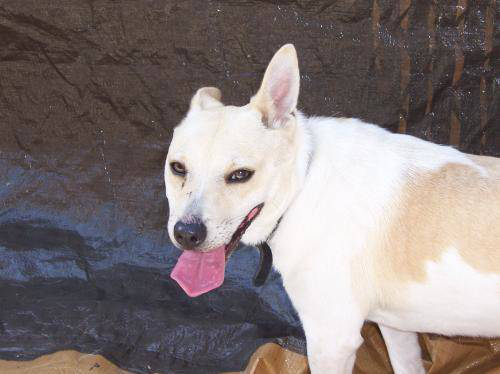

In [36]:
Image.open(path+"/test/" + batches.filenames[4])

In [37]:
save_array(result_path + 'test_preds.dat', preds)
save_array(result_path + 'filenames.dat', batches.filenames)

# submission

In [38]:
preds = load_array(result_path + 'test_preds.dat')
fileNames = load_array(result_path + 'filenames.dat')

In [39]:
preds[:5]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [51]:
#isDog = preds[:,1]
isDog = np.clip(preds[:,1], 0.2, 0.98)

In [52]:
isDog[:5]

array([ 0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.98], dtype=float32)

In [53]:
ids = [int(fn[8:-4]) for fn in fileNames]

In [54]:
ids[:5]

[3286, 8401, 6271, 4983, 8804]

In [55]:
subm = np.stack([ids,isDog], axis=1)

In [56]:
subm[:5]

array([[  3.2860e+03,   2.0000e-01],
       [  8.4010e+03,   2.0000e-01],
       [  6.2710e+03,   2.0000e-01],
       [  4.9830e+03,   2.0000e-01],
       [  8.8040e+03,   9.8000e-01]])

In [57]:
np.savetxt(result_path + "subm98.csv", subm, fmt='%d,%.5f', header='id,label',comments='')

In [58]:
%cd /home/caitsithx/courses/deeplearning1/nbs
FileLink("data/cats-dogs-redux/result/subm98.csv")

/home/caitsithx/courses/deeplearning1/nbs


/home/caitsithx/courses/deeplearning1/nbs/data/cats-dogs-redux/result/subm98.csv